In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib.transforms import Affine2D

from sklearn.linear_model import LogisticRegression # Works
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Works
from sklearn.neighbors import KNeighborsClassifier # Works
from sklearn.naive_bayes import GaussianNB # Works
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import matplotlib.ticker as ticker

SEED = 42
DATA_STRUCTURE = json.load(open('data_structure.json'))
DATA_KEYS = list(DATA_STRUCTURE.keys())
CLASSIFIERS = {
  "GaussianNB":GaussianNB,
  "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis,
  "KNeighborsClassifier":KNeighborsClassifier,
  "DecisionTreeClassifier":DecisionTreeClassifier,
  "LogisticRegression": LogisticRegression,
  # "SVC":SVC
  # Random forrest 
}
OUTPUT_COLS = ['dataset', 'target', 'target_name', 'avg_precision', 'precision_folds', 'avg_recall', 'recall_folds', 'avg_f1', 'f1_folds', 'avg_geometric_mean', 'geometric_mean_folds','avg_specificity','specificity_folds']

In [104]:
aggregateMetrics = {}
aggregateStandardDev = {}
for name in CLASSIFIERS:
  df = pd.read_csv(f'./out/{name}.csv')
  result = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean']].mean()

  standardDev = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean',]].std()
  
  aggregateStandardDev[name] = standardDev
  aggregateMetrics[name] = result

aggregateMetricsAdjustedt1 = {}
aggregateStandardDevAdjustedt1 = {}
for name in CLASSIFIERS:
  df = pd.read_csv(f'./out/balanced/{name}.csv')
  result = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean',]].mean()
  adjustedStandardDev = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean',]].std()

  aggregateMetricsAdjustedt1[name] = result
  aggregateStandardDevAdjustedt1[name] = adjustedStandardDev


aggregateMetricsAdjustedAllMetrics = {}
aggregateStandardDevAdjustedAllMetrics = {}
for name in CLASSIFIERS:
  df = pd.read_csv(f'./out/balanced-all-targets/{name}.csv')
  result = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean',]].mean()
  adjustedStandardDev = df.groupby('target')[['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean',]].std()

  aggregateMetricsAdjustedAllMetrics[name] = result
  aggregateStandardDevAdjustedAllMetrics[name] = adjustedStandardDev

allAggregatePerformances = {
  "Original": (aggregateMetrics,aggregateStandardDev, 'bo'),
  "Adjusted for target 1": (aggregateMetricsAdjustedt1, aggregateStandardDevAdjustedt1, 'ro'),
  "Adjusted for all metrics": (aggregateMetricsAdjustedAllMetrics, aggregateStandardDevAdjustedAllMetrics, 'go')
}

<Figure size 2500x2500 with 0 Axes>

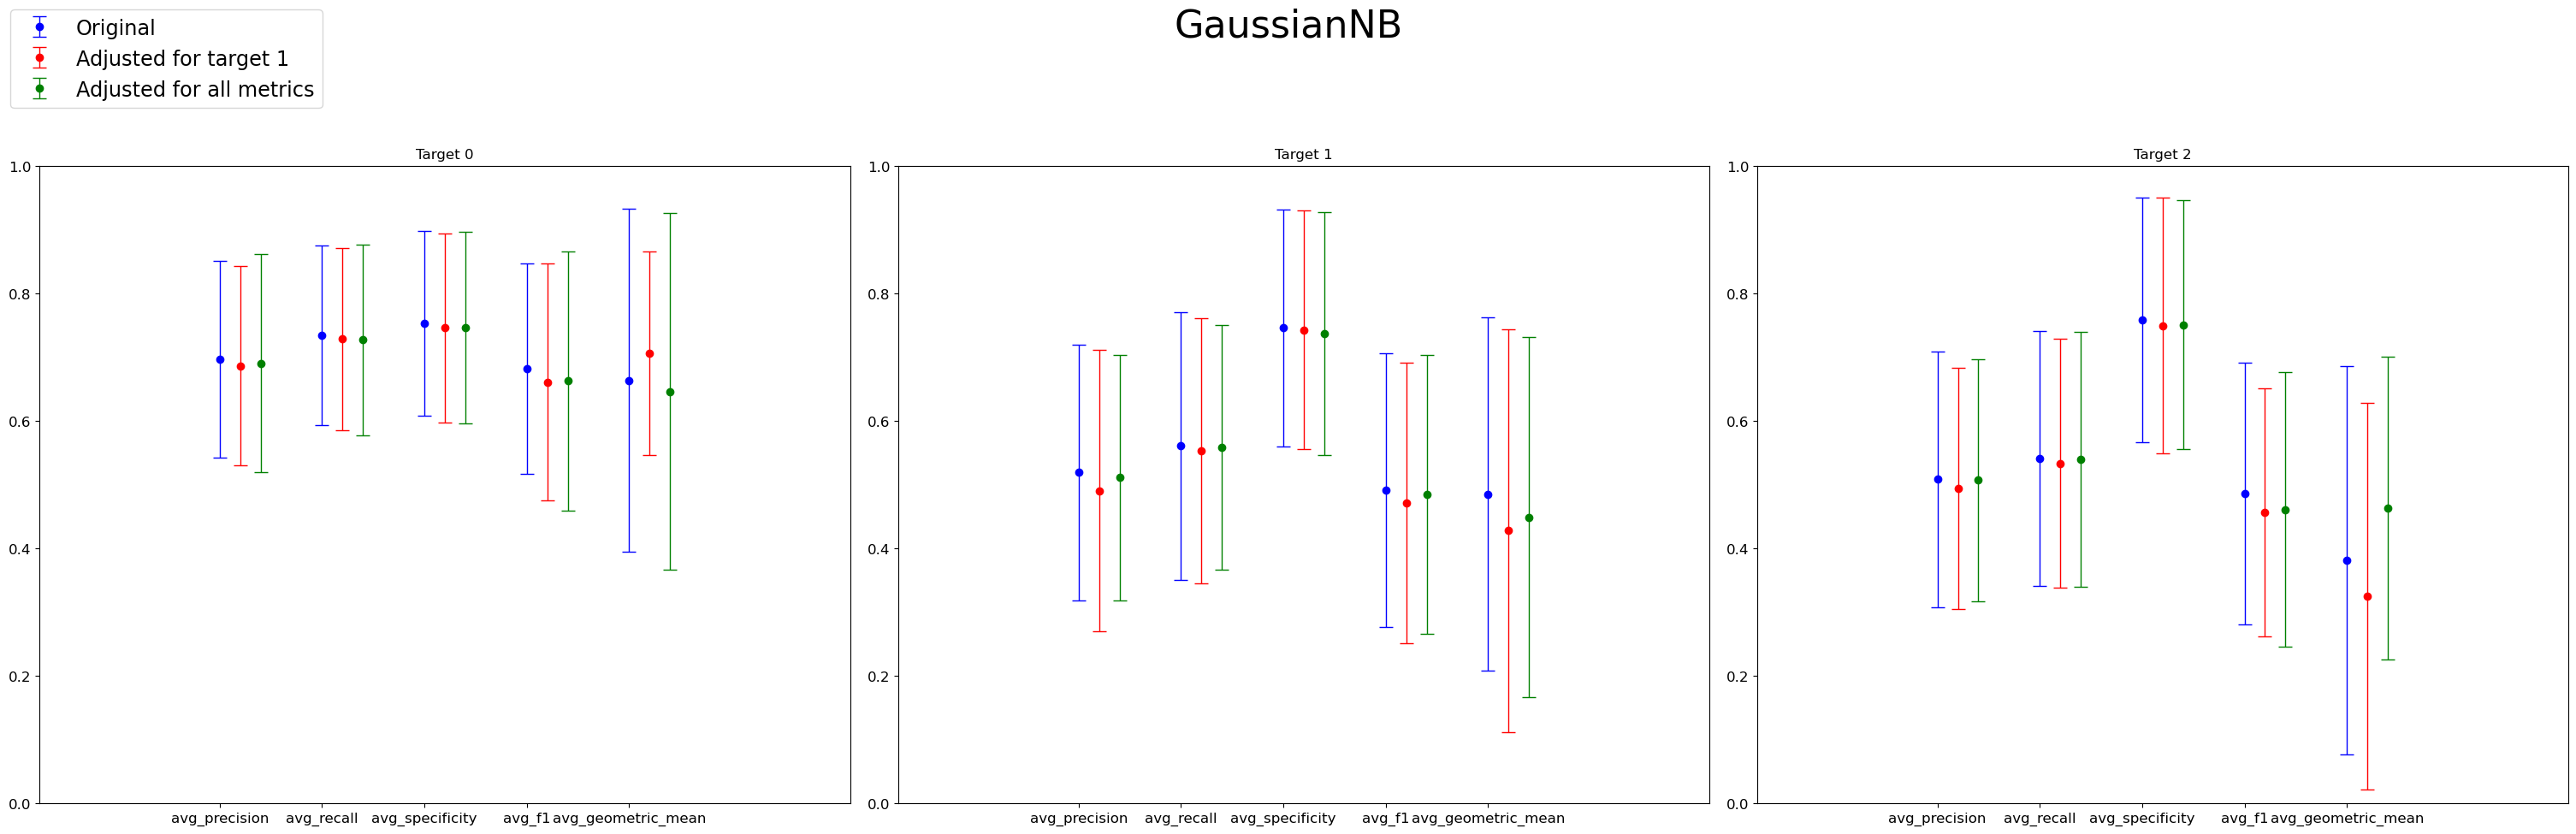

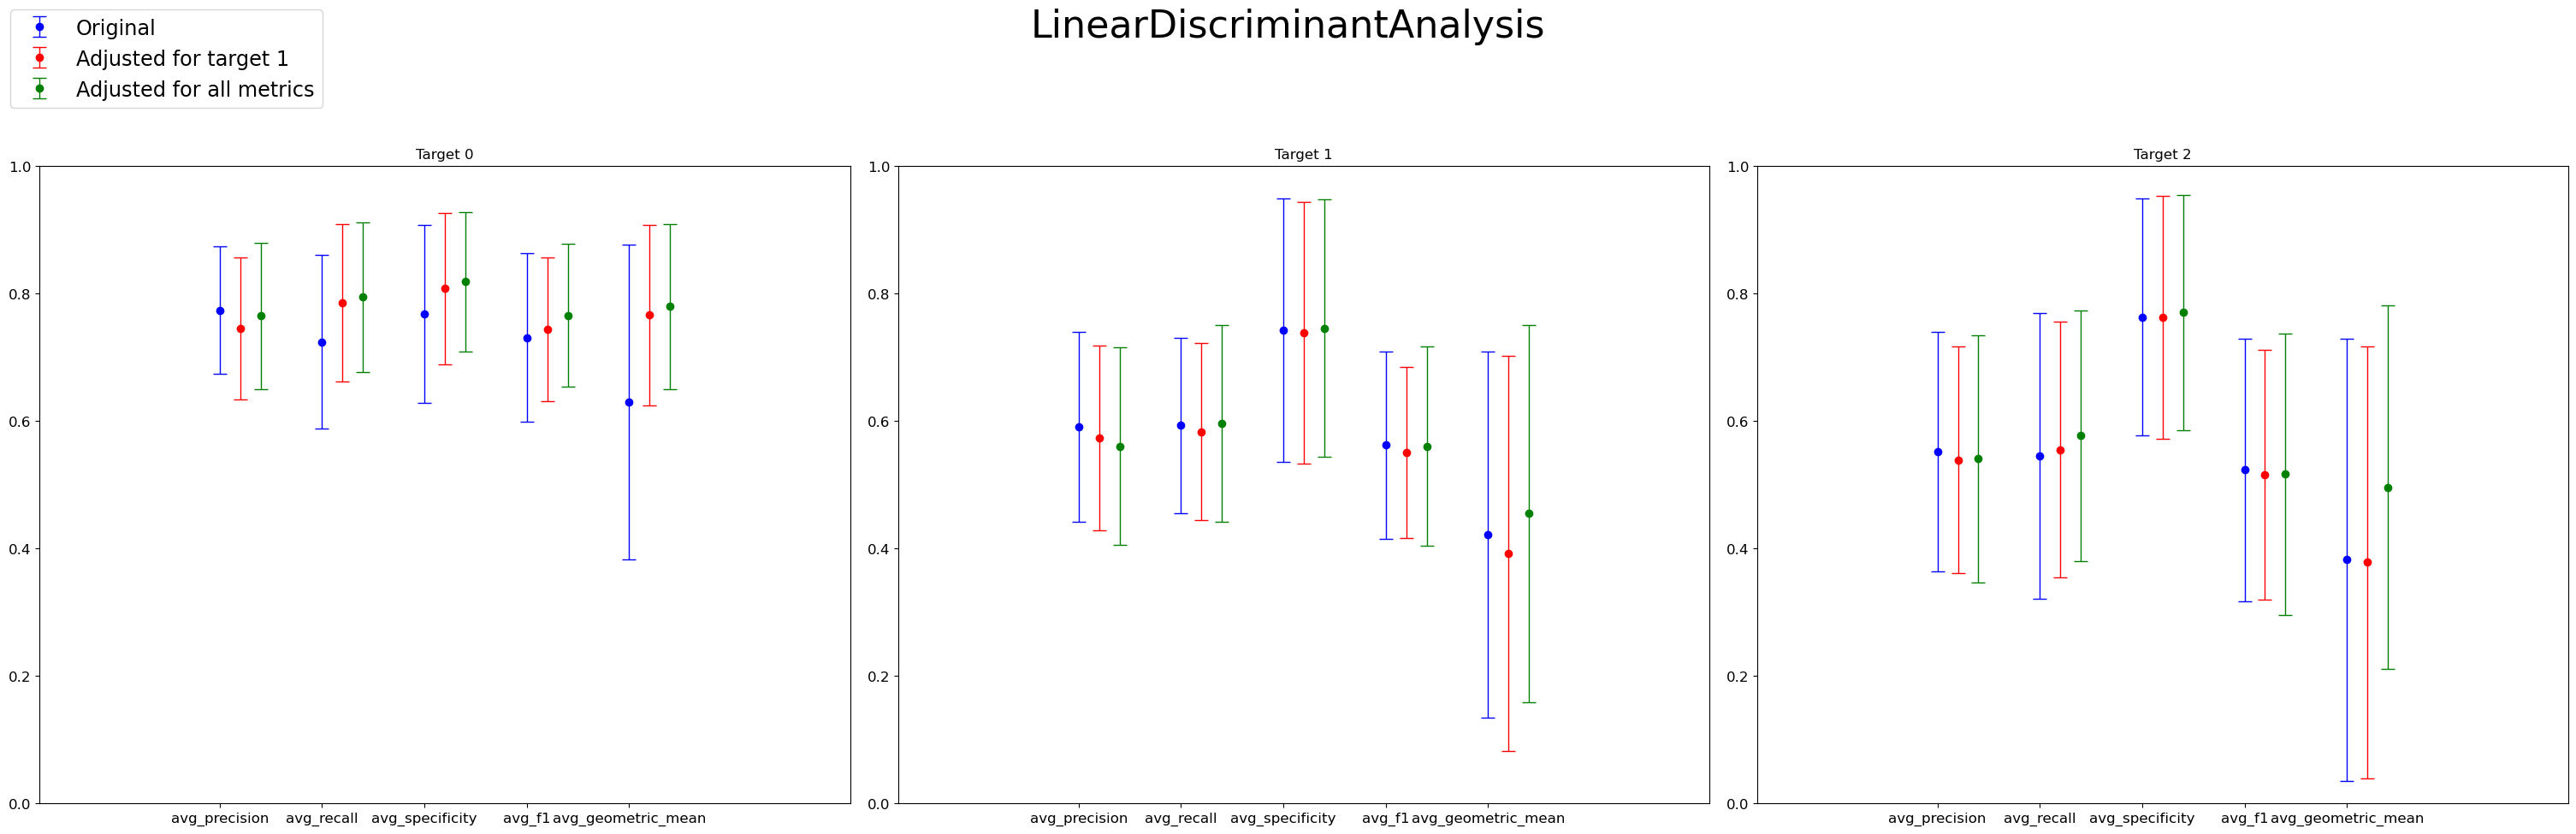

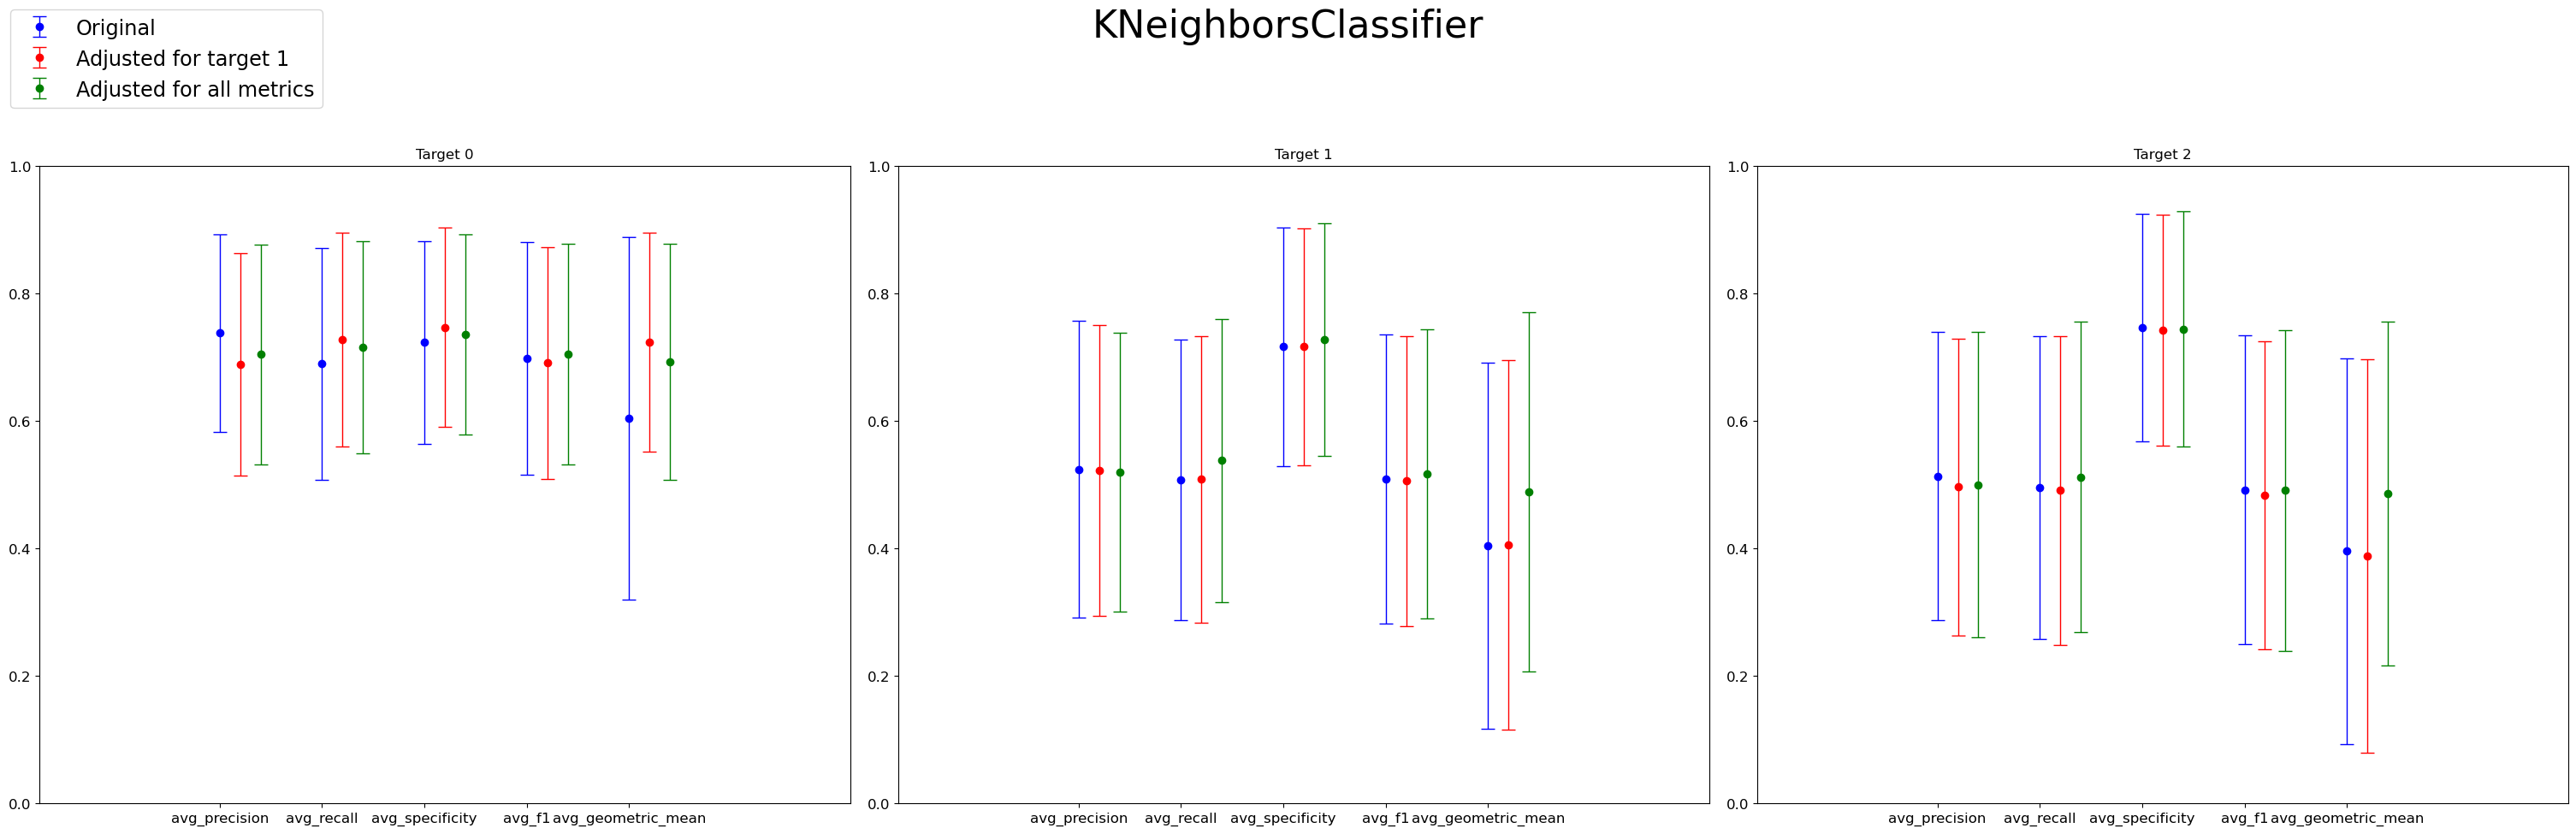

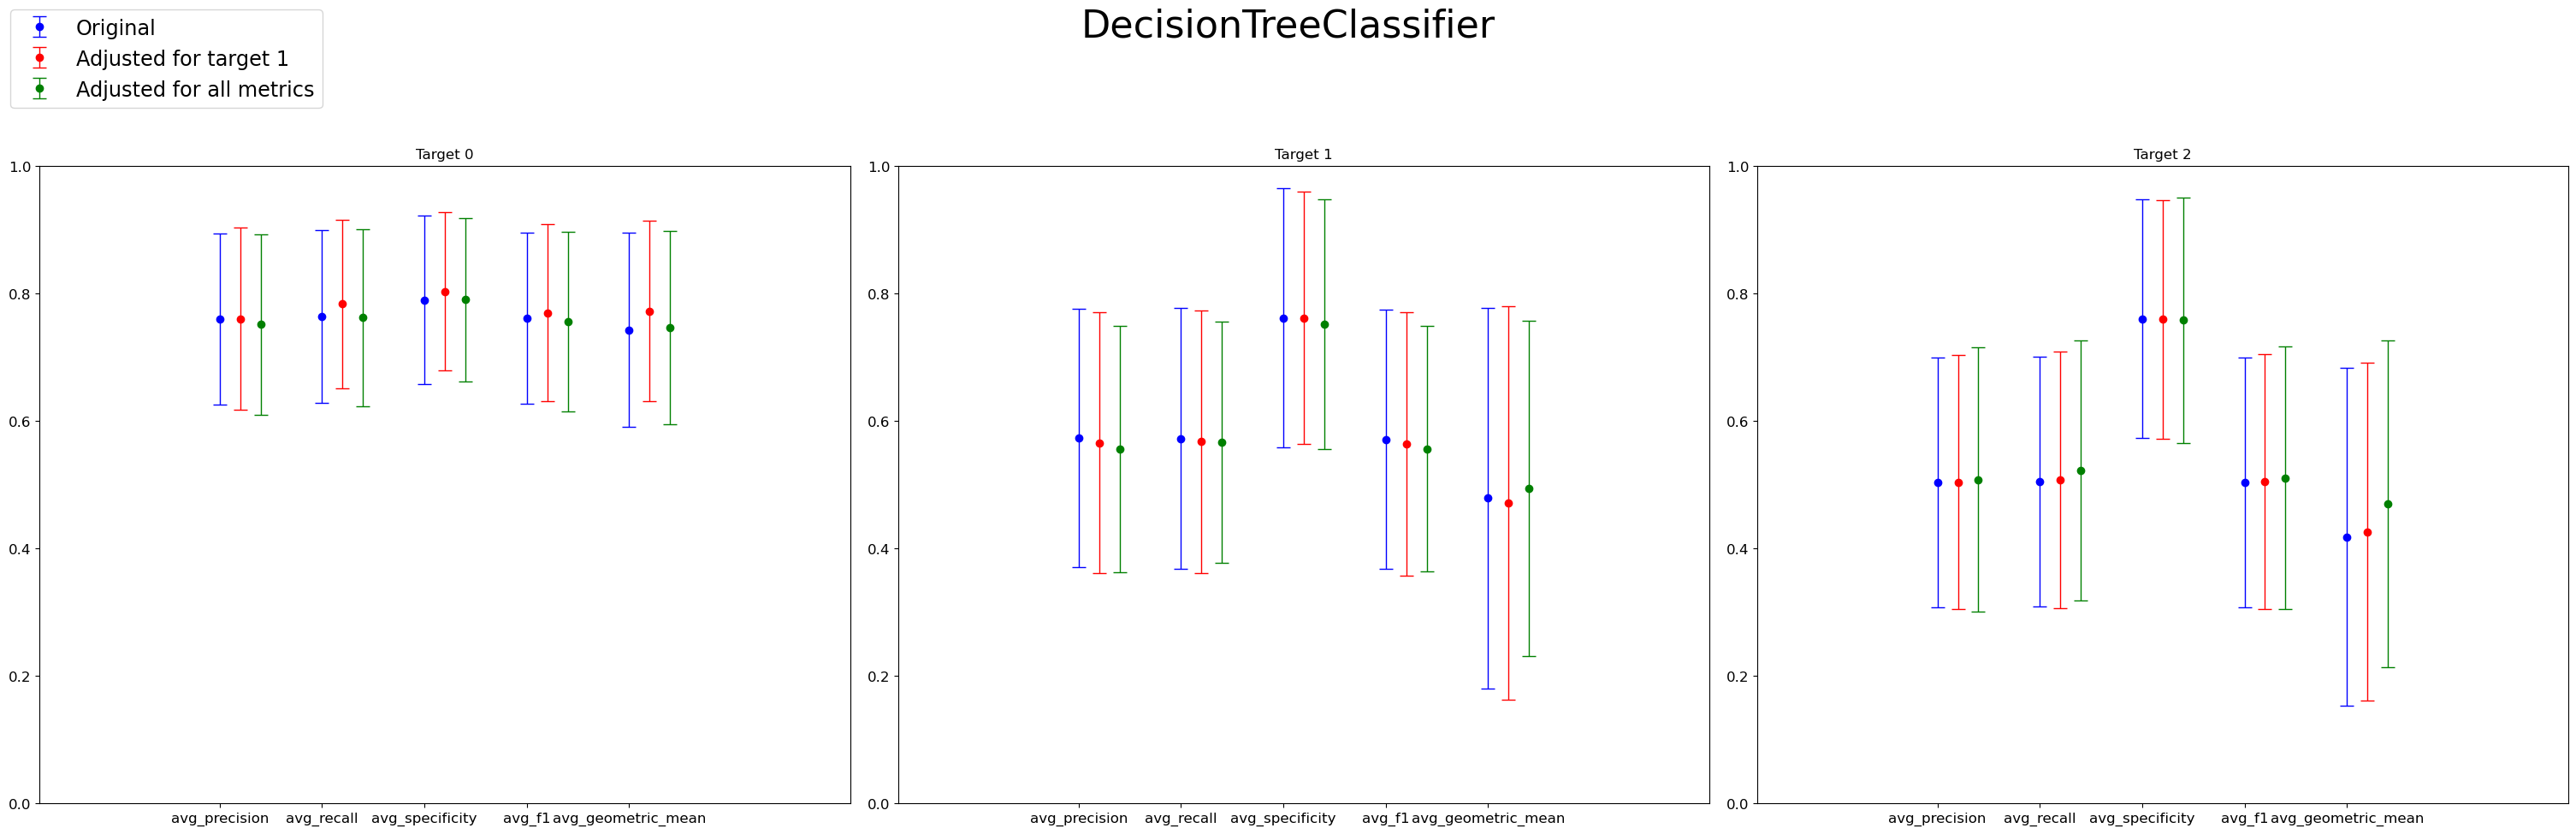

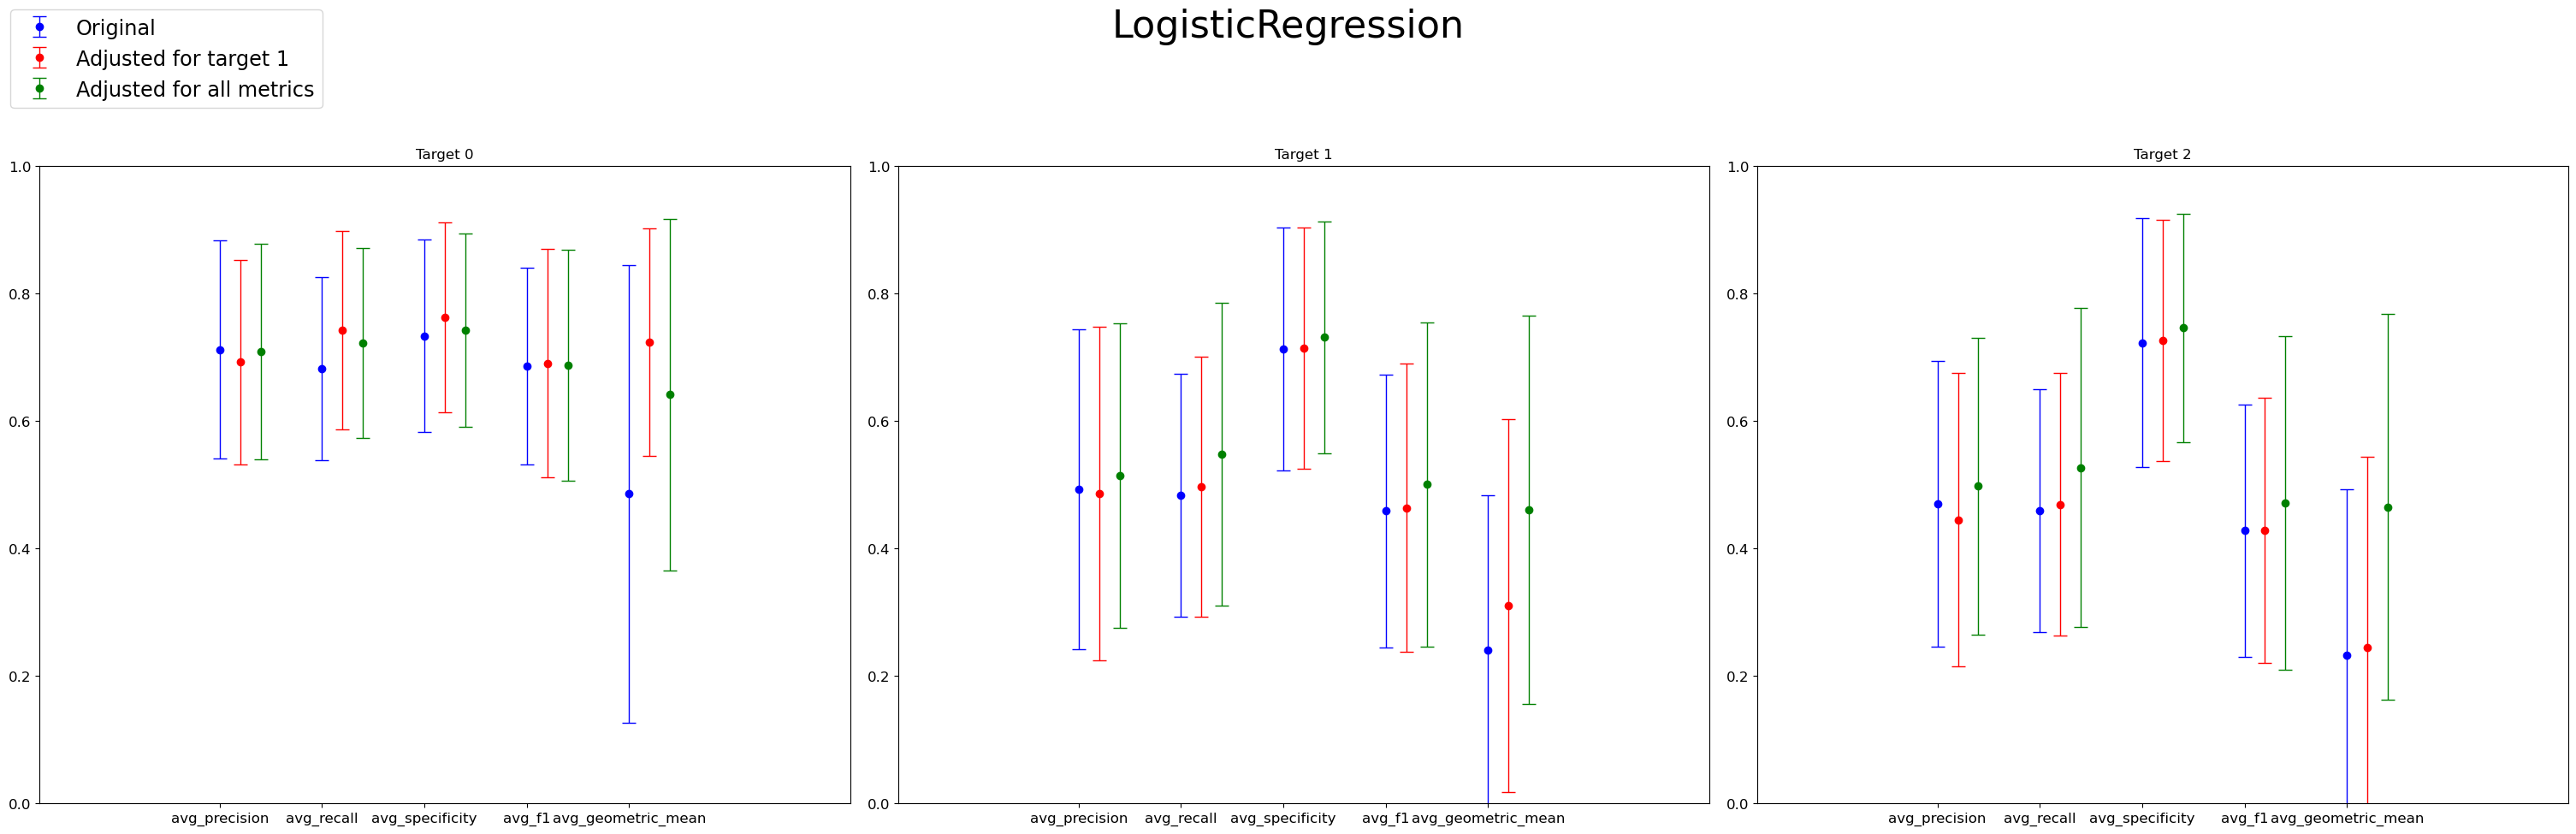

In [108]:
plt.figure(figsize=(25, 25), dpi=100)
learners = list(aggregateMetrics.keys())
for learner in learners:
  metrics = ['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean']

  fig, axs = plt.subplots(1, 3, constrained_layout=True)
  fig.suptitle(learner, fontsize=32, y=1.2)
  fig.set_figwidth(30)
  fig.set_figheight(8)

  loc = ticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals

  # Iterate through the 3 targets
  for i in range(3):

    for j, AggregatePerformance in enumerate(allAggregatePerformances):
      curr = allAggregatePerformances[AggregatePerformance]
      performance = curr[0][learner].iloc[i].values
      performanceStandardDev = curr[1][learner].iloc[i].values
      transformation = Affine2D().translate(0.2*j, 0.0) + axs[i].transData
      axs[i].set(xmargin= 0.4, ylim=(0, 1))
      axs[i].errorbar(metrics, performance, fmt=curr[2],yerr=performanceStandardDev, linewidth=1, capsize=6, transform=transformation, label=AggregatePerformance)

    axs[i].set_title(f'Target {i}')
    axs[i].tick_params(axis='both', which='major', labelsize=12)
  handles, labels = axs[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper left', fontsize='xx-large')
plt.show()

<Figure size 2500x2500 with 0 Axes>

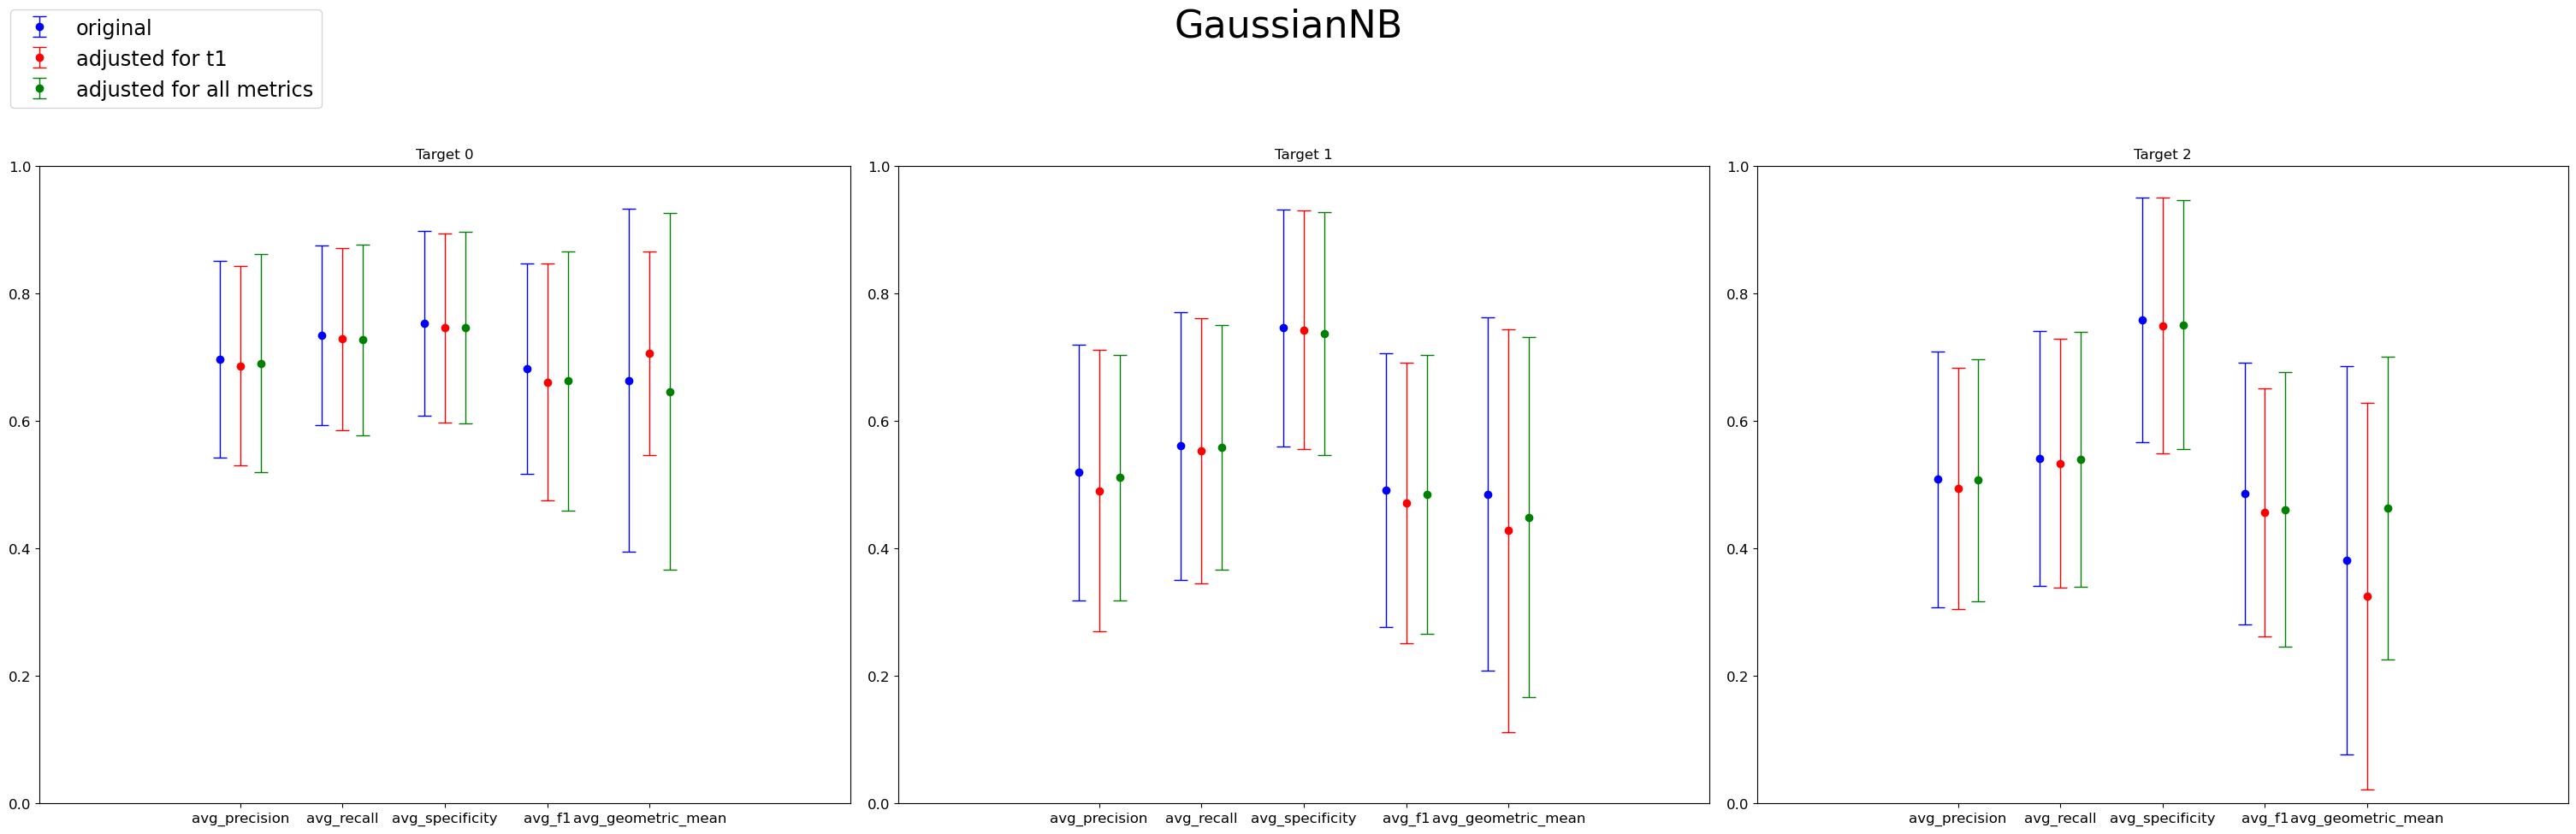

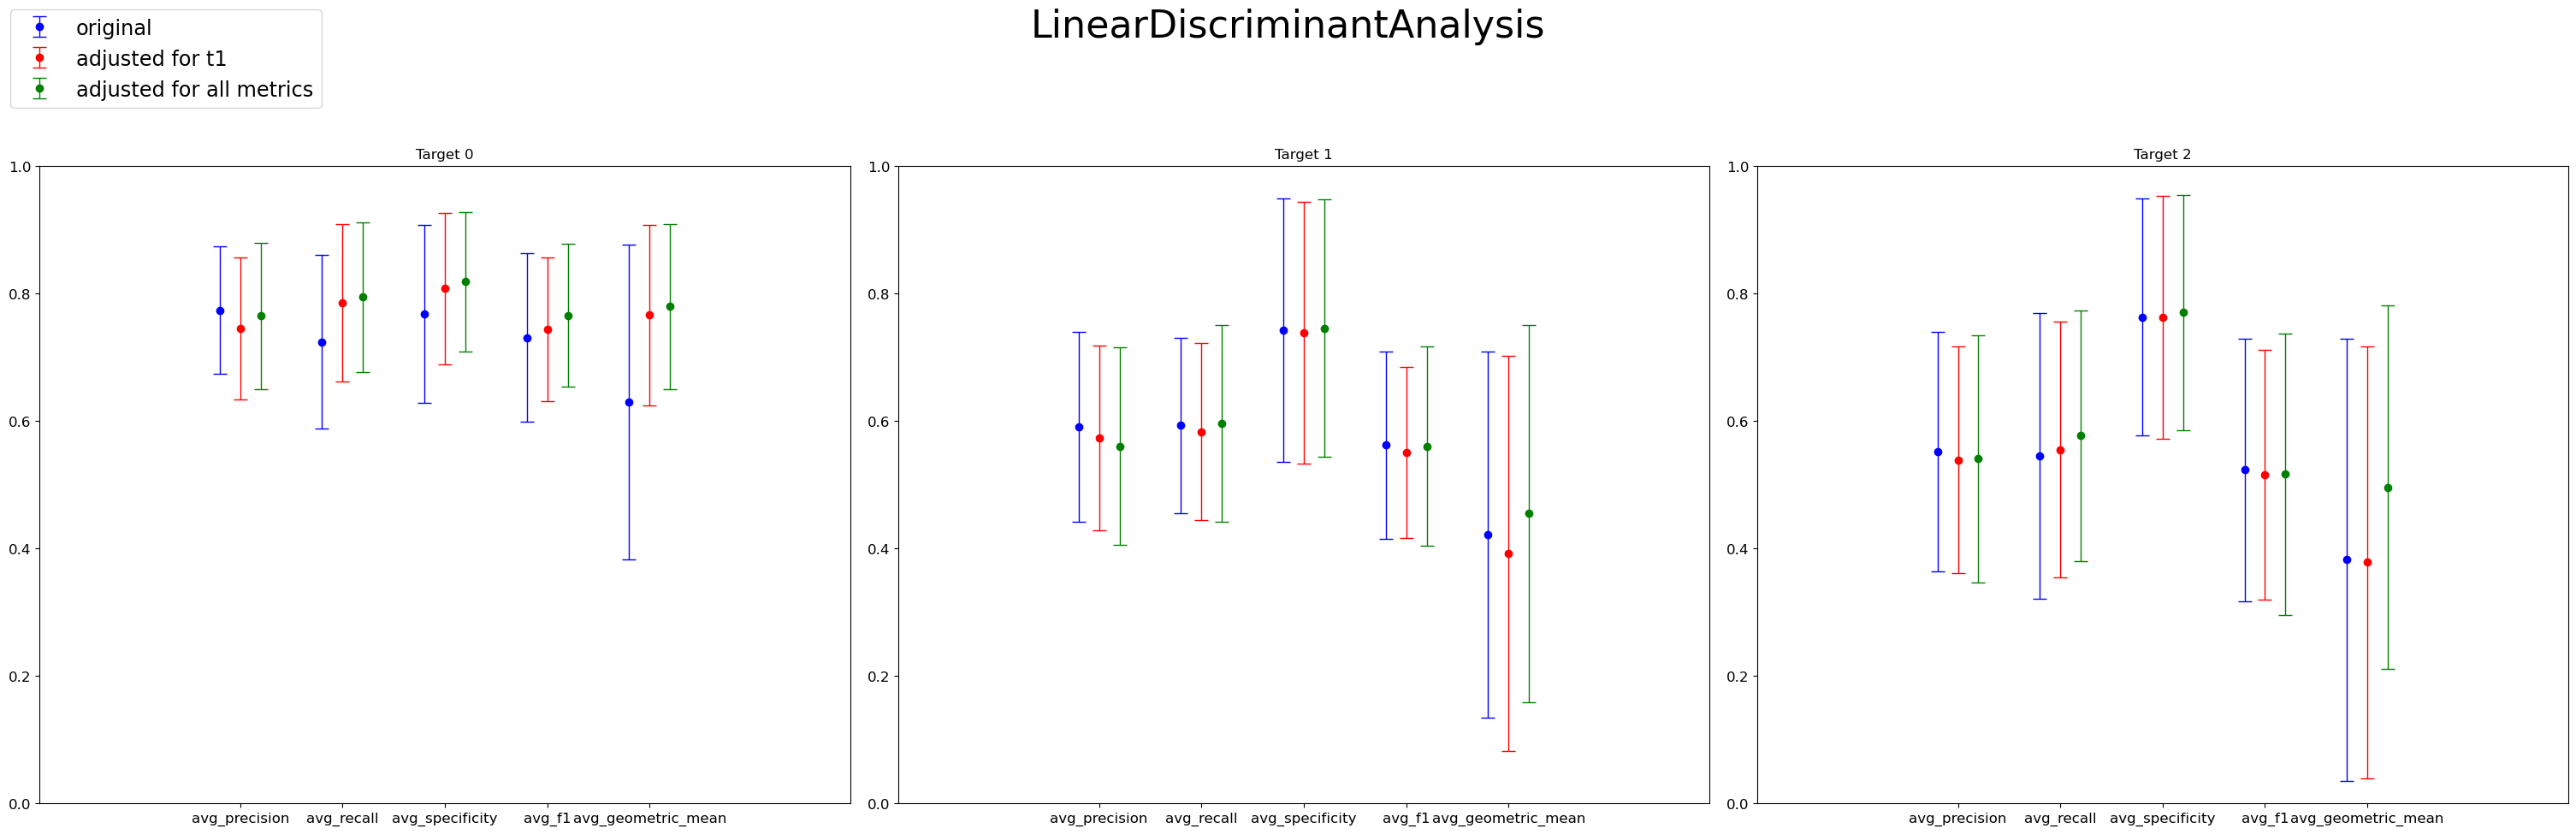

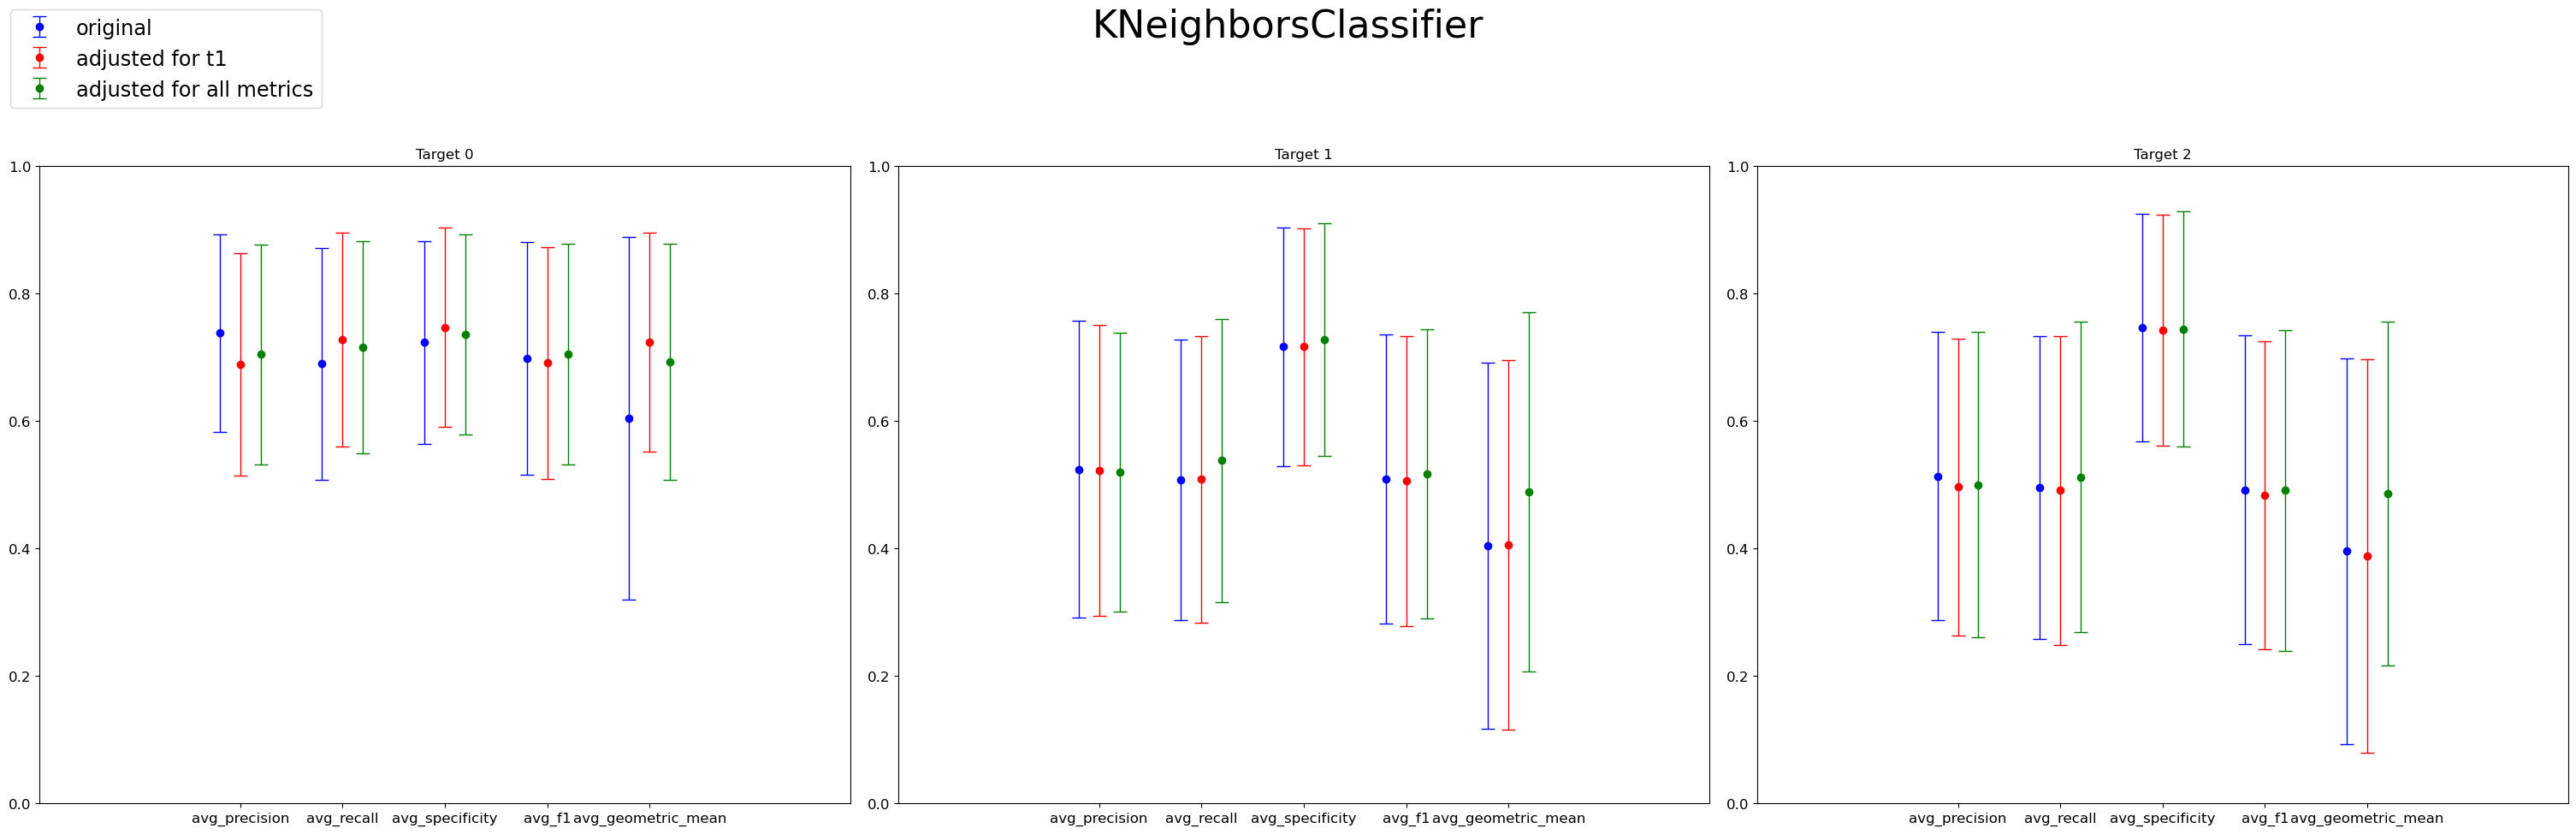

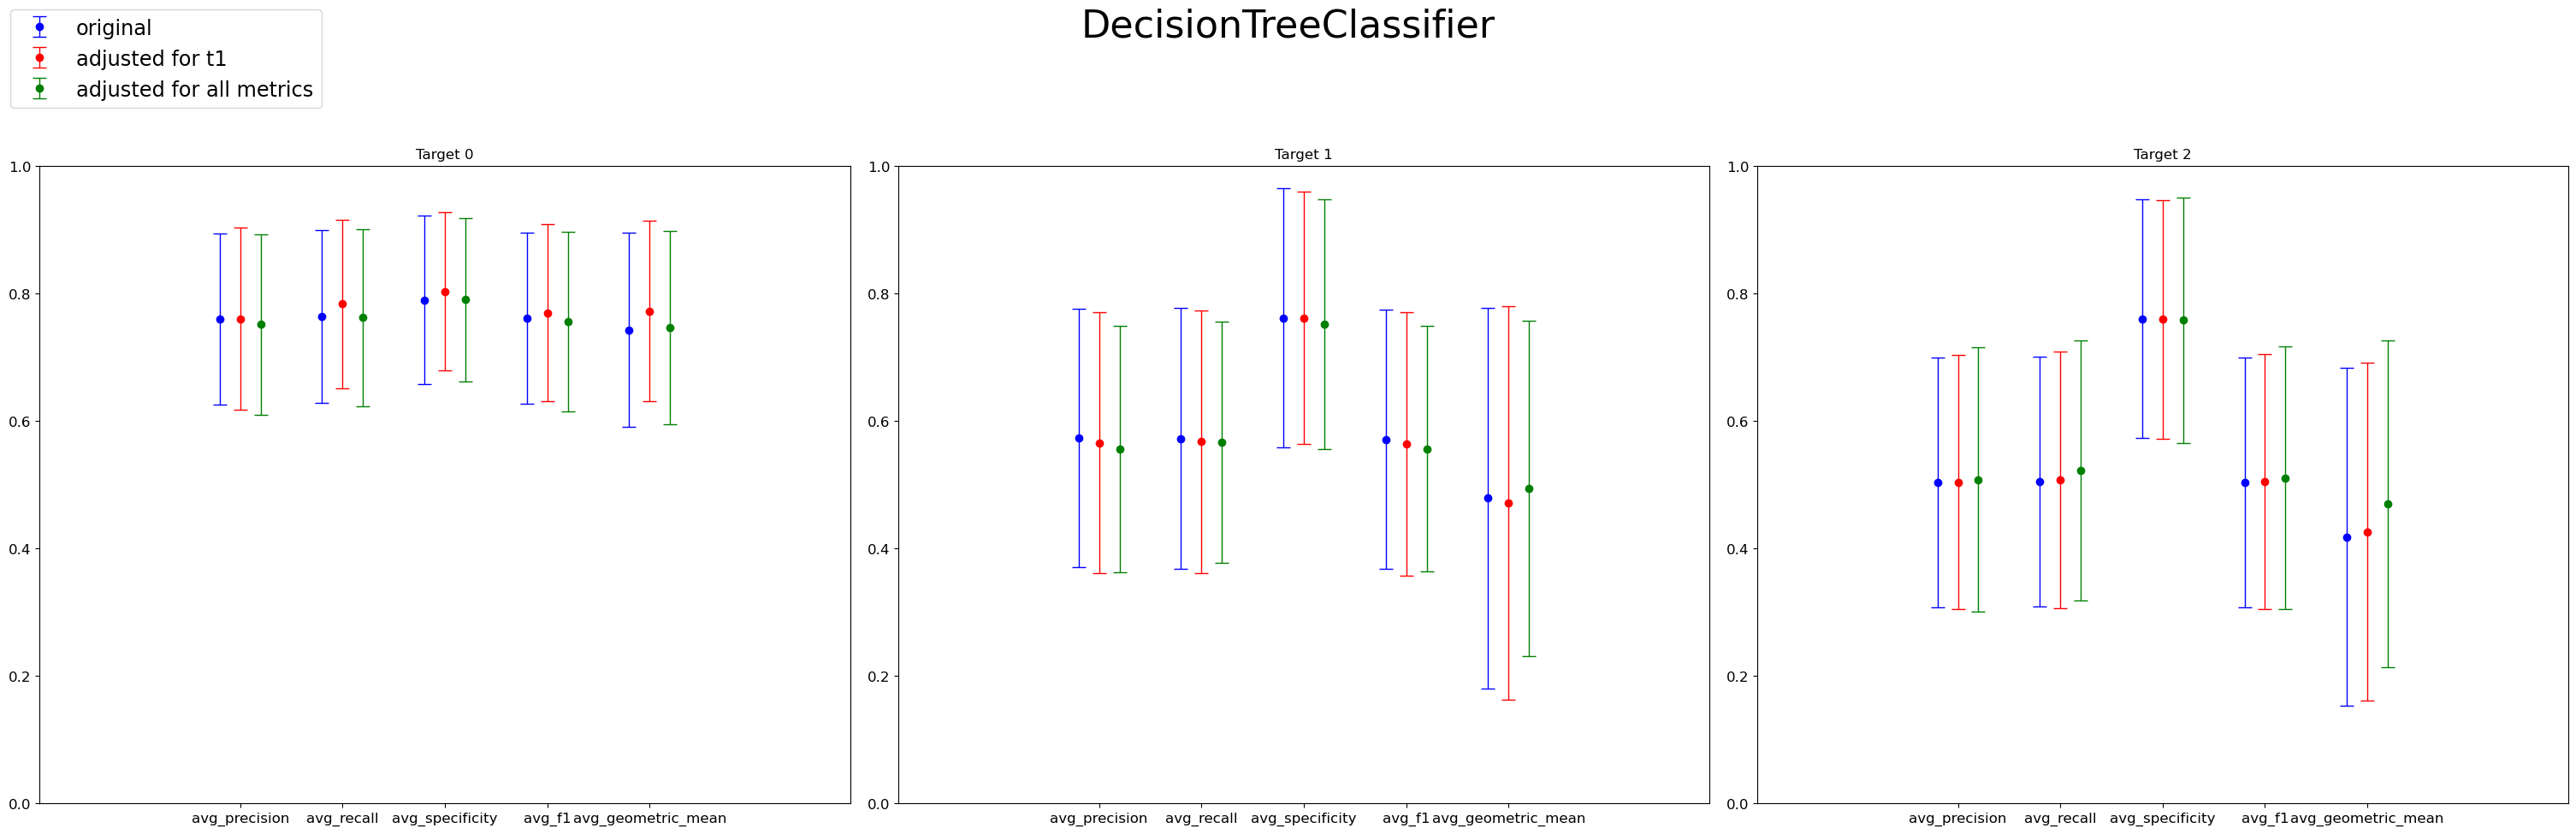

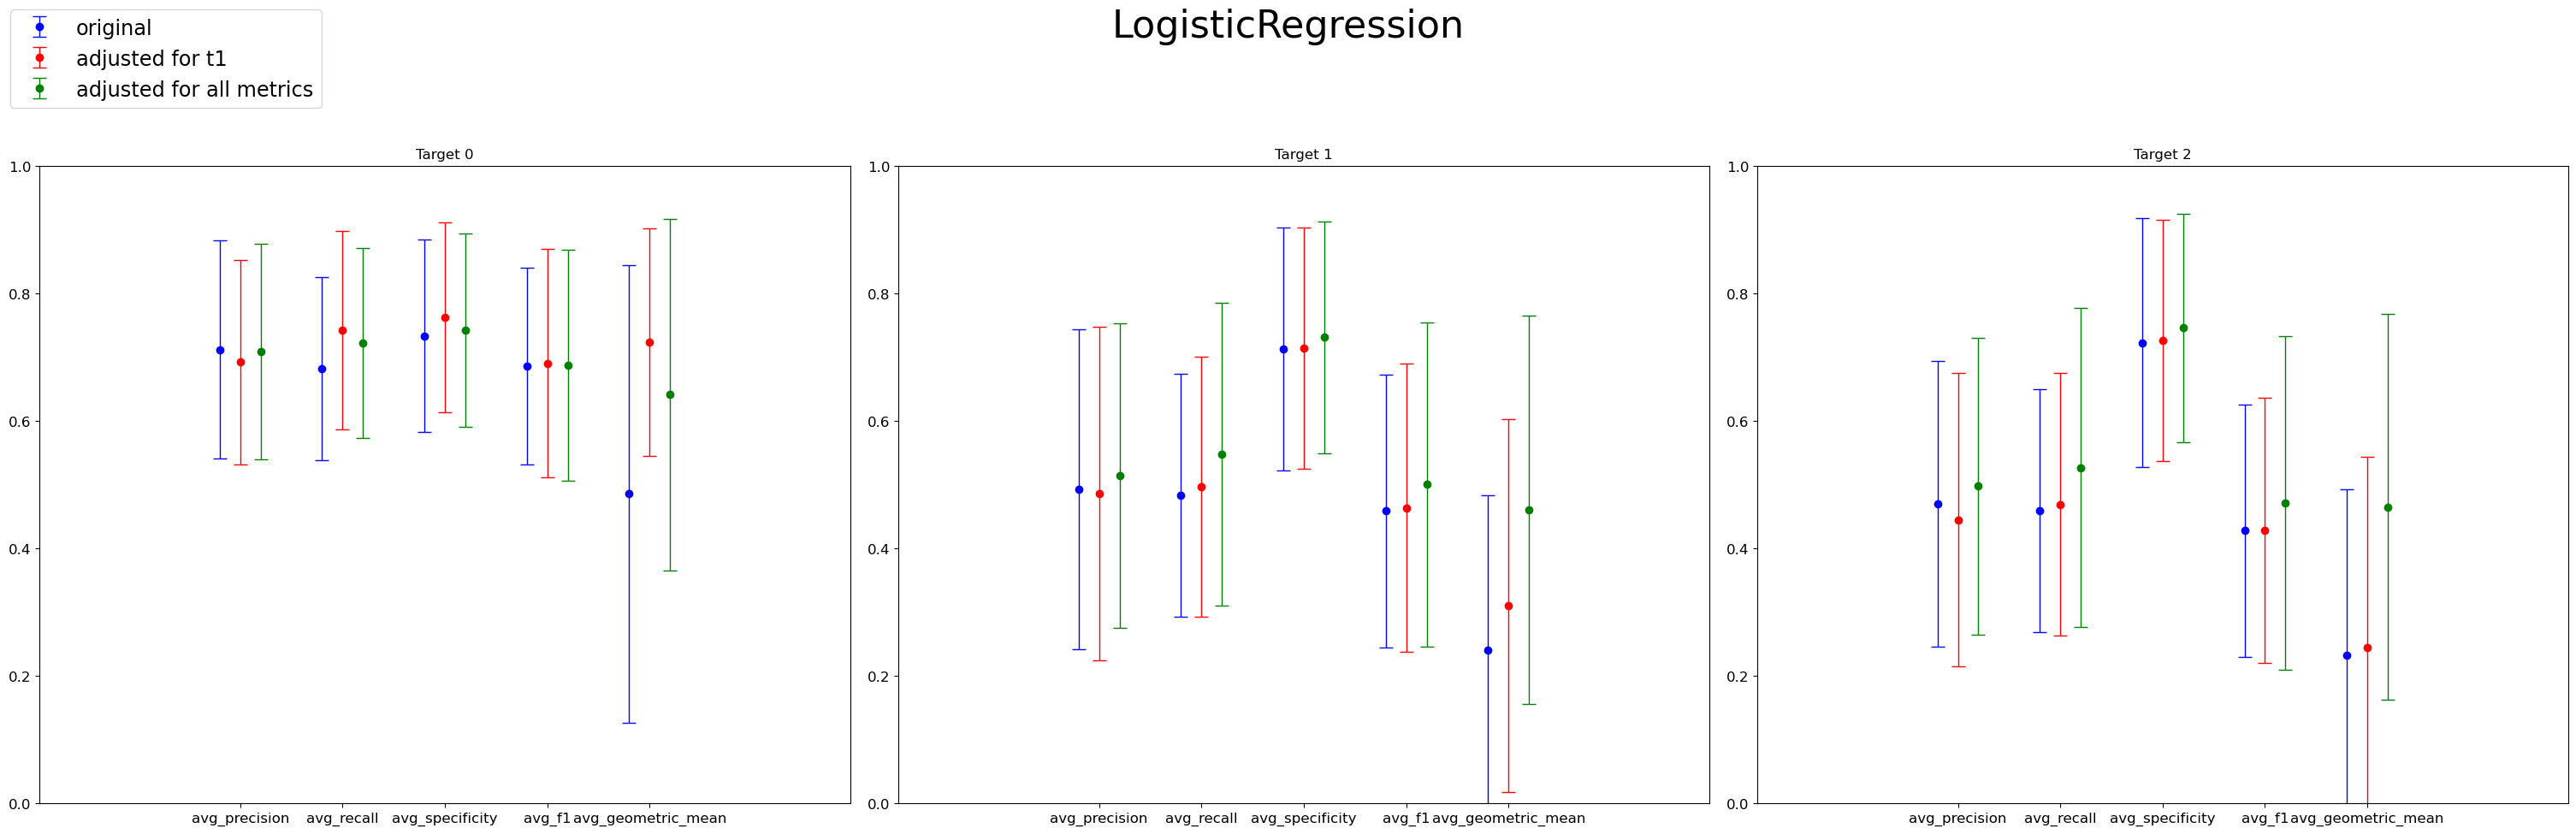

In [91]:
plt.figure(figsize=(25, 25), dpi=100)
learners = list(aggregateMetrics.keys())
for i in range(len(learners)):
  learner = learners[i]
  metrics = ['avg_precision', 'avg_recall', 'avg_specificity', 'avg_f1', 'avg_geometric_mean']

  fig, axs = plt.subplots(1, 3, constrained_layout=True)
  fig.suptitle(learner, fontsize=32, y=1.2)
  fig.set_figwidth(30)
  fig.set_figheight(8)

  loc = ticker.MultipleLocator(base=2.5) # this locator puts ticks at regular intervals
  for i in range(3):

    target= aggregateMetrics[learner].iloc[i].values
    targetStandardDev = aggregateStandardDev[learner].iloc[i].values

    targetAdjustedt1 = aggregateMetricsAdjustedt1[learner].iloc[i].values
    targetAdjustedStandardDevt1 = aggregateStandardDevAdjustedt1[learner].iloc[i].values


    targetAdjustedAllMetrics = aggregateMetricsAdjustedAllMetrics[learner].iloc[i].values
    targetAdjustedStandardDevAllMetrics = aggregateStandardDevAdjustedAllMetrics[learner].iloc[i].values


    left = Affine2D().translate(-0.2, 0.0) + axs[i].transData
    right = Affine2D().translate(0.2, 0.0) + axs[i].transData
    axs[i].set(xmargin= 0.4, ylim=(0, 1))
    axs[i].errorbar(metrics, target, fmt='bo',yerr=targetStandardDev, linewidth=1, capsize=6, transform=left, label="original")
    axs[i].errorbar(metrics, targetAdjustedt1, yerr=targetAdjustedStandardDevt1, fmt='ro', linewidth=1, capsize=6, label="adjusted for t1")
    axs[i].errorbar(metrics, targetAdjustedAllMetrics, yerr=targetAdjustedStandardDevAllMetrics, fmt='go', linewidth=1, capsize=6,  transform=right, label="adjusted for all metrics")
    axs[i].set_title(f'Target {i}')
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].set
  handles, labels = axs[0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper left', fontsize='xx-large')
plt.show()